In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


In [2]:

# Wczytanie danych z pliku CSV
data_file = "simulation_results.csv"
df = pd.read_csv(data_file)

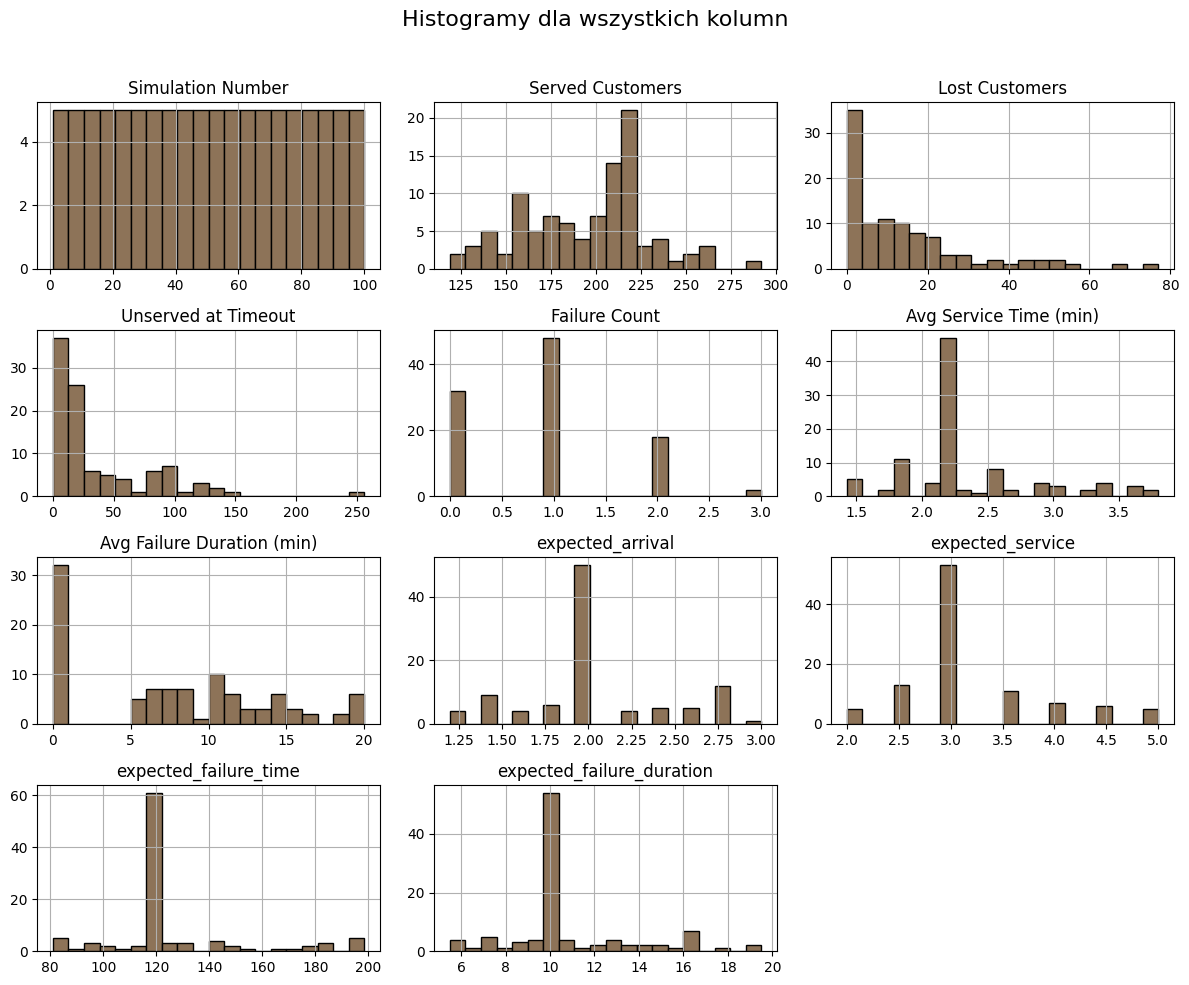

In [33]:
df.hist(bins=20, figsize=(12, 10), grid=True, color='#8d7358', edgecolor='black')
plt.suptitle("Histogramy dla wszystkich kolumn", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [4]:
# Wyświetlenie pierwszych kilku wierszy danych
print("Podgląd danych:")
df.head()


Podgląd danych:


,Simulation Number,Served Customers,Lost Customers,Unserved at Timeout,Failure Count,Avg Service Time (min),Avg Failure Duration (min),expected_arrival,expected_service,expected_failure_time,expected_failure_duration
0,1,183,0,82,0,2.621864,0.000000,1.8,3.5,120.0,14.0
1,2,212,11,13,1,2.186469,8.781050,2.0,3.0,120.0,10.0
2,3,162,9,0,2,1.811079,15.104939,2.8,2.5,117.5,13.0
3,4,189,0,48,0,2.539392,0.000000,2.0,3.5,120.0,10.0
4,5,188,0,58,0,2.536531,0.000000,2.0,3.5,120.0,10.0


In [5]:

# Podstawowe statystyki opisowe
print("\nPodstawowe statystyki opisowe:")
df.describe()



Podstawowe statystyki opisowe:


,Simulation Number,Served Customers,Lost Customers,Unserved at Timeout,Failure Count,Avg Service Time (min),Avg Failure Duration (min),expected_arrival,expected_service,expected_failure_time,expected_failure_duration
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,195.380000,13.850000,36.070000,0.900000,2.344708,7.670009,2.050000,3.200000,126.870000,10.770000
std,29.011492,34.945782,16.498163,45.255114,0.758787,0.516775,6.343919,0.424859,0.692675,25.656395,2.817173
min,1.000000,119.000000,0.000000,0.000000,0.000000,1.431308,0.000000,1.200000,2.000000,81.000000,5.500000
25%,25.750000,166.000000,0.000000,1.750000,0.000000,2.160564,0.000000,2.000000,3.000000,120.000000,10.000000
50%,50.500000,204.500000,8.500000,18.000000,1.000000,2.204682,7.798589,2.000000,3.000000,120.000000,10.000000
75%,75.250000,217.000000,20.000000,55.000000,1.000000,2.540448,11.911404,2.200000,3.500000,122.000000,11.000000
max,100.000000,292.000000,77.000000,256.000000,3.000000,3.796305,20.000000,3.000000,5.000000,198.500000,19.500000


In [6]:
COLUMNS_TO_ANALYZE = [
    'expected_arrival', 'expected_service', 'expected_failure_time', 'expected_failure_duration'
]

drop_columns = [
    'Simulation Number', 'Unserved at Timeout', 'Failure Count',
    'Avg Service Time (min)', 'Avg Failure Duration (min)'
]
# # Usunięcie niepotrzebnych kolumn
df_only_relevant = df.drop(columns=drop_columns)

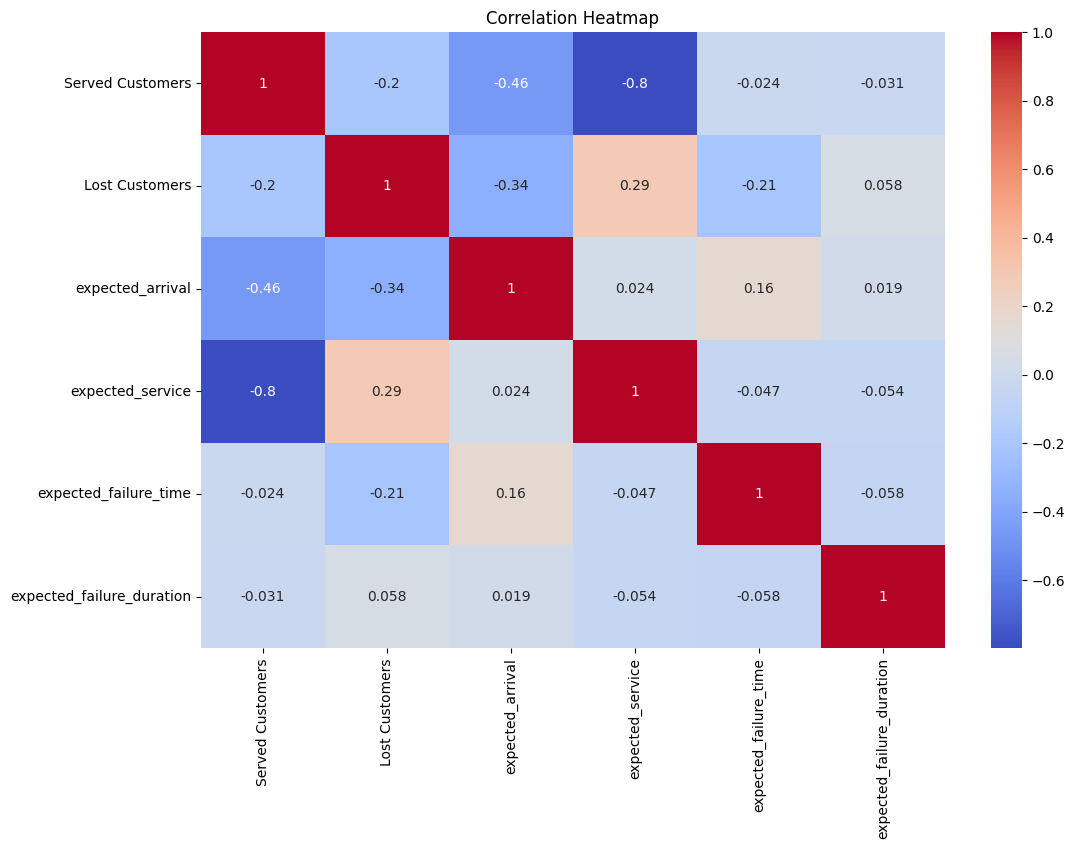

In [7]:
correlations = df_only_relevant.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# testy statystyczne T served customers dla jednej próbki o wartości 200
# Test t dla jednej próbki
t, p = stats.ttest_1samp(df['Served Customers'], 200)
print(f"\nTest T dla jednej próbki: t={t}, p={p}")
print("teza: średnia liczba obsłużonych klientów jest równa 200")
print("H0: μ = 200")
print("H1: μ ≠ 200")
if p < 0.05:
    print("Odrzucamy hipotezę zerową: średnia liczba obsłużonych klientów różni się od 200.")
else:
    print("Nie odrzucamy hipotezy zerowej: średnia liczba obsłużonych klientów nie różni się od 200.")

mean_value = df['Served Customers'].mean()
std_dev = df['Served Customers'].std()

print(f"Średnia liczba obsłużonych klientów: {mean_value:.2f}")
print(f"Odchylenie standardowe: {std_dev:.2f}")




Test T dla jednej próbki: t=-1.3220479671456515, p=0.18919870580662135
teza: średnia liczba obsłużonych klientów jest równa 200
H0: μ = 200
H1: μ ≠ 200
Nie odrzucamy hipotezy zerowej: średnia liczba obsłużonych klientów nie różni się od 200.
Średnia liczba obsłużonych klientów: 195.38
Odchylenie standardowe: 34.95


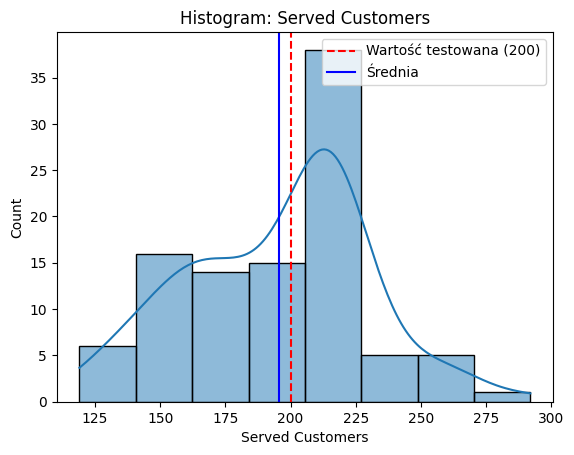

In [9]:
plt.figure()
sns.histplot(df['Served Customers'], kde=True)
plt.axvline(200, color='red', linestyle='--', label='Wartość testowana (200)')
plt.axvline(df['Served Customers'].mean(), color='blue', label='Średnia')
plt.title("Histogram: Served Customers")
plt.legend()
plt.show()

In [10]:

# Testy statystyczne (np. test t-Studenta dla dwóch grup)
print("\nTest t-Studenta dla 'Served Customers' i 'Lost Customers':")
t_stat, p_value = stats.ttest_ind(df["Served Customers"], df["Lost Customers"], equal_var=False)
print(f"t-stat={t_stat:.4f}, p={p_value:.4f}")
print("Hipoteza zerowa: średnia liczba obsłużonych klientów jest równa średniej liczby utraconych klientów")
print("H0: μ_served = μ_lost")
print("H1: μ_served ≠ μ_lost")
if p_value < 0.05:
    print("  Odrzucamy hipotezę zerową - różnice są istotne statystycznie.")
else:
    print("  Nie odrzucamy hipotezy zerowej - różnice nie są istotne statystycznie.")


Test t-Studenta dla 'Served Customers' i 'Lost Customers':
t-stat=46.9743, p=0.0000
Hipoteza zerowa: średnia liczba obsłużonych klientów jest równa średniej liczby utraconych klientów
H0: μ_served = μ_lost
H1: μ_served ≠ μ_lost
  Odrzucamy hipotezę zerową - różnice są istotne statystycznie.


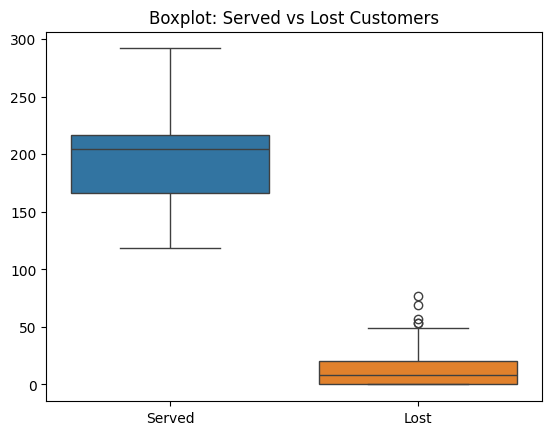

In [11]:
plt.figure()
sns.boxplot(data=[df["Served Customers"], df["Lost Customers"]])
plt.xticks([0, 1], ["Served", "Lost"])
plt.title("Boxplot: Served vs Lost Customers")
plt.show()

In [38]:
data_file = "simulation_results_same.csv"
df_same = pd.read_csv(data_file)

group1 = df_same[df_same['expected_service'] == 3.0]['Served Customers']
group2 = df_same[df_same['expected_service'] == 4.0]['Served Customers']

print("\nTest t-Studenta dla 'Served Customers' w grupach o różnych wartościach expected_service:")

# Test t dla dwóch grup
t_arrival, p_arrival = stats.ttest_ind(group1, group2, equal_var=False)
print(f"\nDodatkowy test (expected_service 3.0 vs 4.0): t = {t_arrival:.4f}, p = {p_arrival:.4f}")
print("Hipoteza zerowa: średnia liczba obsłużonych klientów w grupach o różnych wartościach expected_service jest równa")
print("H0: μ_group1 = μ_group2")
print("H1: μ_group1 ≠ μ_group2")
if p_arrival < 0.05:
    print("Odrzucamy hipotezę zerową - różnice są istotne statystycznie.")


Test t-Studenta dla 'Served Customers' w grupach o różnych wartościach expected_service:

Dodatkowy test (expected_service 3.0 vs 4.0): t = 67.2939, p = 0.0000
Hipoteza zerowa: średnia liczba obsłużonych klientów w grupach o różnych wartościach expected_service jest równa
H0: μ_group1 = μ_group2
H1: μ_group1 ≠ μ_group2
Odrzucamy hipotezę zerową - różnice są istotne statystycznie.


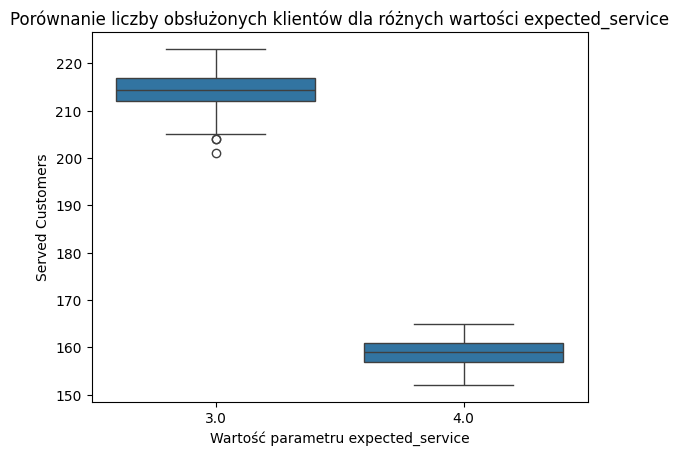

In [39]:
# Wizualizacja
comparison_df = pd.concat([
    group1.to_frame().assign(expected_service='3.0'),
    group2.to_frame().assign(expected_service='4.0')
])

# Teraz robimy wykres z pełnym kontekstem
plt.figure()
sns.boxplot(x='expected_service', y='Served Customers', data=comparison_df)
plt.title("Porównanie liczby obsłużonych klientów dla różnych wartości expected_service")
plt.ylabel("Served Customers")
plt.xlabel("Wartość parametru expected_service")
plt.show()

In [14]:
import statsmodels.api as sm

# Wybór zmiennych niezależnych (predyktorów) i zmiennej zależnej
X = df_only_relevant[COLUMNS_TO_ANALYZE]  # Zmienna niezależna
y = df_only_relevant['Served Customers']  # Zmienna zależna

# Dodanie stałej do modelu (intercept)
X = sm.add_constant(X)

# Dopasowanie modelu regresji wielorakiej
model = sm.OLS(y, X).fit()

# Wyświetlenie podsumowania wyników
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Served Customers   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 21 May 2025   Prob (F-statistic):           7.80e-37
Time:                        20:20:48   Log-Likelihood:                -405.35
No. Observations:                 100   AIC:                             820.7
Df Residuals:                      95   BIC:                             833.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

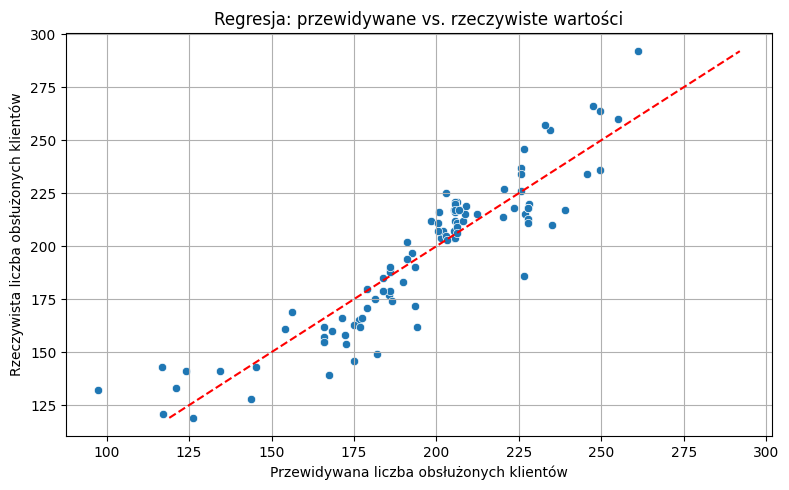

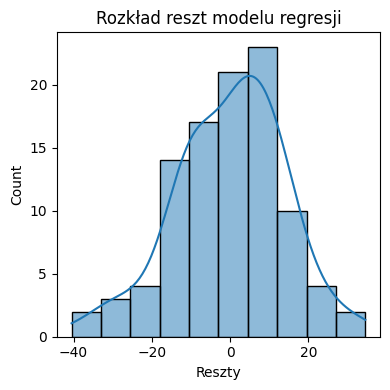

In [43]:
y_pred = model.predict(X)
residuals = y - y_pred
# Wykres 1: Predykcja vs. Rzeczywiste
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Przewidywana liczba obsłużonych klientów")
plt.ylabel("Rzeczywista liczba obsłużonych klientów")
plt.title("Regresja: przewidywane vs. rzeczywiste wartości")
plt.grid(True)
plt.tight_layout()
plt.show()

# Wykres 2 (opcjonalnie): Rozkład reszt
plt.figure(figsize=(4, 4))
sns.histplot(residuals, kde=True)
plt.title("Rozkład reszt modelu regresji")
plt.xlabel("Reszty")
plt.tight_layout()
plt.show()